In [ ]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the training set
data = pd.read_csv('./AAPL.csv')
# "Open" has been taken as the target variable
training_set = data.iloc[:, 1:2].values

In [ ]:
training_set

array([[19.779285],
       [19.567142],
       [19.1775  ],
       ...,
       [42.525002],
       [42.75    ],
       [42.630001]])

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,26.738270,26.957582,26.511831,26.740302,24.794746,2.258274e+08
std,7.407581,7.437419,7.370204,7.412704,7.471182,1.493920e+08
min,13.856071,14.271428,13.753572,13.947500,12.230474,4.590360e+07
25%,19.918929,20.098572,19.779822,19.908214,17.792248,1.216430e+08
50%,26.969999,27.217501,26.705000,26.982500,25.012623,1.858868e+08
75%,31.498750,31.727500,31.228750,31.471251,28.914570,2.822750e+08
max,43.777500,44.299999,43.715000,44.105000,42.516113,1.460852e+09


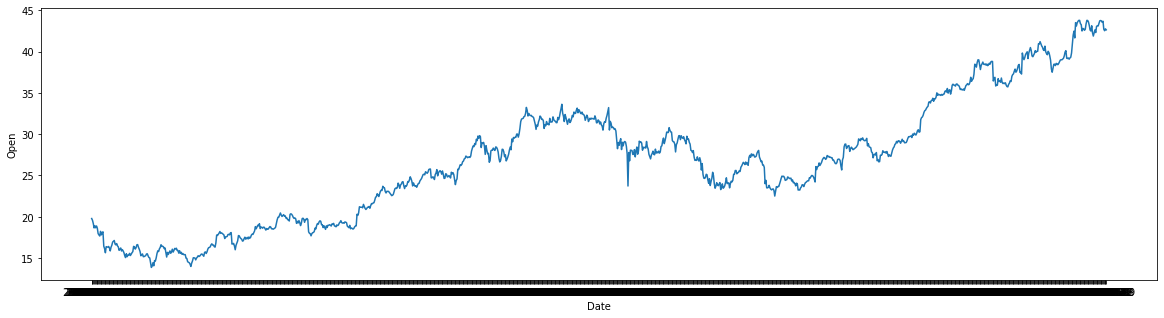

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.lineplot(x = "Date", y = "Open", data=data)
plt.show()

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
print(training_set_scaled)

[[0.19795893]
 [0.19086893]
 [0.17784675]
 ...
 [0.95814044]
 [0.96566006]
 [0.96164959]]


In [ ]:
# Creating a data structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train)
X_train.shape

[[0.19795893 0.19086893 0.17784675 ... 0.09246841 0.08174984 0.07382435]
 [0.19086893 0.17784675 0.15997852 ... 0.08174984 0.07382435 0.06437099]
 [0.17784675 0.15997852 0.16858436 ... 0.07382435 0.06437099 0.04730245]
 ...
 [0.82579371 0.82370491 0.82053    ... 0.9921461  0.99640719 0.96398905]
 [0.82370491 0.82053    0.82512526 ... 0.99640719 0.96398905 0.95814044]
 [0.82053    0.82512526 0.83172595 ... 0.96398905 0.95814044 0.96566006]]


(1199, 60)

In [ ]:
print(y_train)
y_train.shape

[0.06437099 0.04730245 0.05180237 ... 0.95814044 0.96566006 0.96164959]


(1199,)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(X_train)

[[[0.19795893]
  [0.19086893]
  [0.17784675]
  ...
  [0.09246841]
  [0.08174984]
  [0.07382435]]

 [[0.19086893]
  [0.17784675]
  [0.15997852]
  ...
  [0.08174984]
  [0.07382435]
  [0.06437099]]

 [[0.17784675]
  [0.15997852]
  [0.16858436]
  ...
  [0.07382435]
  [0.06437099]
  [0.04730245]]

 ...

 [[0.82579371]
  [0.82370491]
  [0.82053   ]
  ...
  [0.9921461 ]
  [0.99640719]
  [0.96398905]]

 [[0.82370491]
  [0.82053   ]
  [0.82512526]
  ...
  [0.99640719]
  [0.96398905]
  [0.95814044]]

 [[0.82053   ]
  [0.82512526]
  [0.83172595]
  ...
  [0.96398905]
  [0.95814044]
  [0.96566006]]]


In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 110ms/step - loss: 0.0391
Epoch 2/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0041
Epoch 7/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0037
Epoch 8/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0039
Epoch 10/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0038
Epoch 13/100
38

38/38 [==============================] - 3s 89ms/step - loss: 9.9708e-04


In [ ]:
# Part 3 - Making the predictions and visualising the results using the test dataset

# Getting the real stock price of 2017
dataset_test = pd.read_csv('./AAPLTest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
real_stock_price

array([[42.540001],
       [43.1325  ],
       [43.134998],
       [43.360001],
       [43.587502],
       [43.637501],
       [43.290001],
       [43.647499],
       [44.044998],
       [44.474998],
       [44.037498],
       [44.842499],
       [44.6525  ],
       [44.325001],
       [44.325001],
       [44.3125  ],
       [43.627499],
       [43.      ],
       [42.540001],
       [41.3825  ]])

In [ ]:
# Getting the predicted stock price of 2018
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
print(predicted_stock_price)

[[42.885654]
 [42.85256 ]
 [42.980556]
 [43.18261 ]
 [43.396694]
 [43.595516]
 [43.739902]
 [43.738323]
 [43.712234]
 [43.790783]
 [44.024666]
 [44.205334]
 [44.43737 ]
 [44.630695]
 [44.6709  ]
 [44.60132 ]
 [44.5037  ]
 [44.29556 ]
 [43.93632 ]
 [43.485355]]


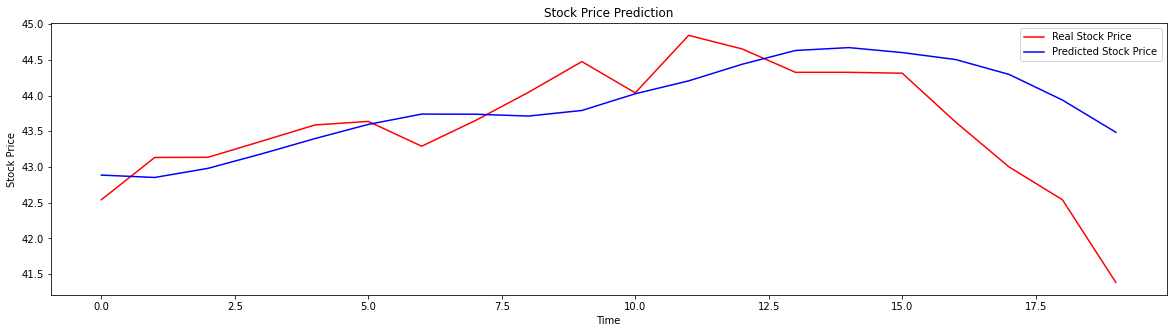

In [ ]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
predicted_stock_price

array([[42.885654],
       [42.85256 ],
       [42.980556],
       [43.18261 ],
       [43.396694],
       [43.595516],
       [43.739902],
       [43.738323],
       [43.712234],
       [43.790783],
       [44.024666],
       [44.205334],
       [44.43737 ],
       [44.630695],
       [44.6709  ],
       [44.60132 ],
       [44.5037  ],
       [44.29556 ],
       [43.93632 ],
       [43.485355]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error: ", mean_absolute_error(predicted_stock_price, real_stock_price))
mse = mean_squared_error(predicted_stock_price, real_stock_price)
print("Mean Squared Error: ", mse)
import math
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  0.5112199140258792
Mean Squared Error:  0.5323861983592864
Root Mean Squared Error:  0.7296479962004188


In [ ]:
predicted_stock_price.shape[0]

20

In [ ]:
real_stock_price.shape[0]

20

In [ ]:
predicted_stock_price = predicted_stock_price.reshape(-1)
print(predicted_stock_price)
print()

real_stock_price = real_stock_price.reshape(-1)
print(real_stock_price)

[42.885654 42.85256  42.980556 43.18261  43.396694 43.595516 43.739902
 43.738323 43.712234 43.790783 44.024666 44.205334 44.43737  44.630695
 44.6709   44.60132  44.5037   44.29556  43.93632  43.485355]

[42.540001 43.1325   43.134998 43.360001 43.587502 43.637501 43.290001
 43.647499 44.044998 44.474998 44.037498 44.842499 44.6525   44.325001
 44.325001 44.3125   43.627499 43.       42.540001 41.3825  ]
